In [3]:
import pandas as pd 
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# from collections import Counter
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import mean_squared_error


# from surprise import Dataset, Reader
# from surprise.model_selection import train_test_split
# from surprise import KNNBasic, SVD, CoClustering
# from surprise.accuracy import rmse,mae


# from surprise import KNNBasic, Dataset, Reader
# from surprise.model_selection import train_test_split
# from surprise import accuracy
# from collections import defaultdict

In [3]:
links_df = pd.read_csv('MovieLens_100k/links.csv')
movies_df = pd.read_csv('MovieLens_100k/movies.csv')
ratings_df = pd.read_csv('MovieLens_100k/ratings.csv')
tags_df = pd.read_csv('MovieLens_100k/tags.csv')

datasets = {
    "Links": links_df,
    "Movies": movies_df,
    "Ratings": ratings_df,
    "Tags": tags_df
}

datasets_info = {name: df.head() for name, df in datasets.items()}
datasets_info

{'Links':    movieId  imdbId   tmdbId
 0        1  114709    862.0
 1        2  113497   8844.0
 2        3  113228  15602.0
 3        4  114885  31357.0
 4        5  113041  11862.0,
 'Movies':    movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  ,
 'Ratings':    userId  movieId  rating  timestamp
 0       1        1     4.0  964982703
 1       1        3     4.0  964981247
 2       1        6     4.0  964982224
 3       1       47     5.0  9

# Exploratory Data Analysis 

In [3]:
# Check for missing values in each dataset
missing_values = {name: df.isnull().sum() for name, df in datasets.items()}

# Print the information about missing values
for name, missing in missing_values.items():
    print(f"Missing values in {name} dataset:\n{missing}\n")

Missing values in Links dataset:
movieId    0
imdbId     0
tmdbId     8
dtype: int64

Missing values in Movies dataset:
movieId    0
title      0
genres     0
dtype: int64

Missing values in Ratings dataset:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing values in Tags dataset:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64



In [4]:
# Print the shape of each DataFrame
for name, df in datasets.items():
    print(f"The shape of the {name} DataFrame is: {df.shape}")

The shape of the Links DataFrame is: (9742, 3)
The shape of the Movies DataFrame is: (9742, 3)
The shape of the Ratings DataFrame is: (100836, 4)
The shape of the Tags DataFrame is: (3683, 4)


In [5]:
distribution_of_ratings = ratings_df.groupby('rating').size().reset_index(name='count')
distribution_of_ratings

,rating,count
0,0.5,1370
1,1.0,2811
2,1.5,1791
3,2.0,7551
4,2.5,5550
5,3.0,20047
6,3.5,13136
7,4.0,26818
8,4.5,8551
9,5.0,13211


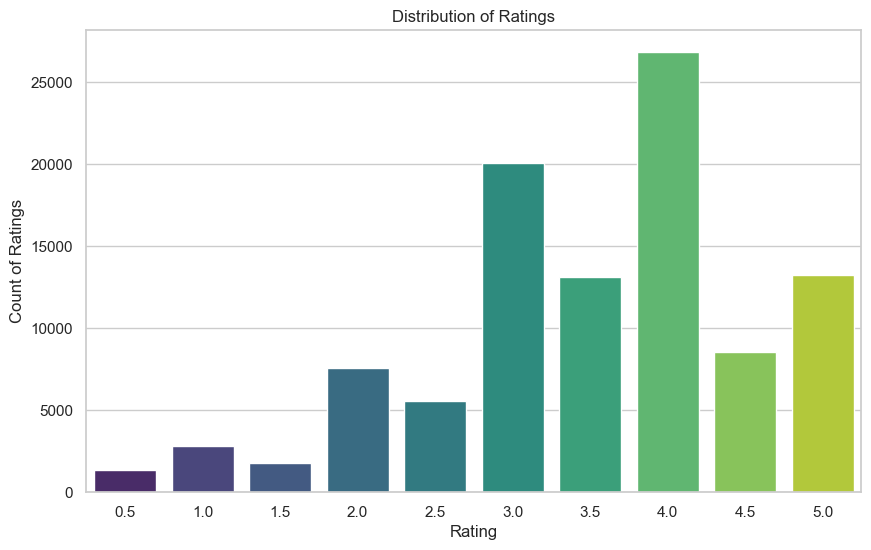

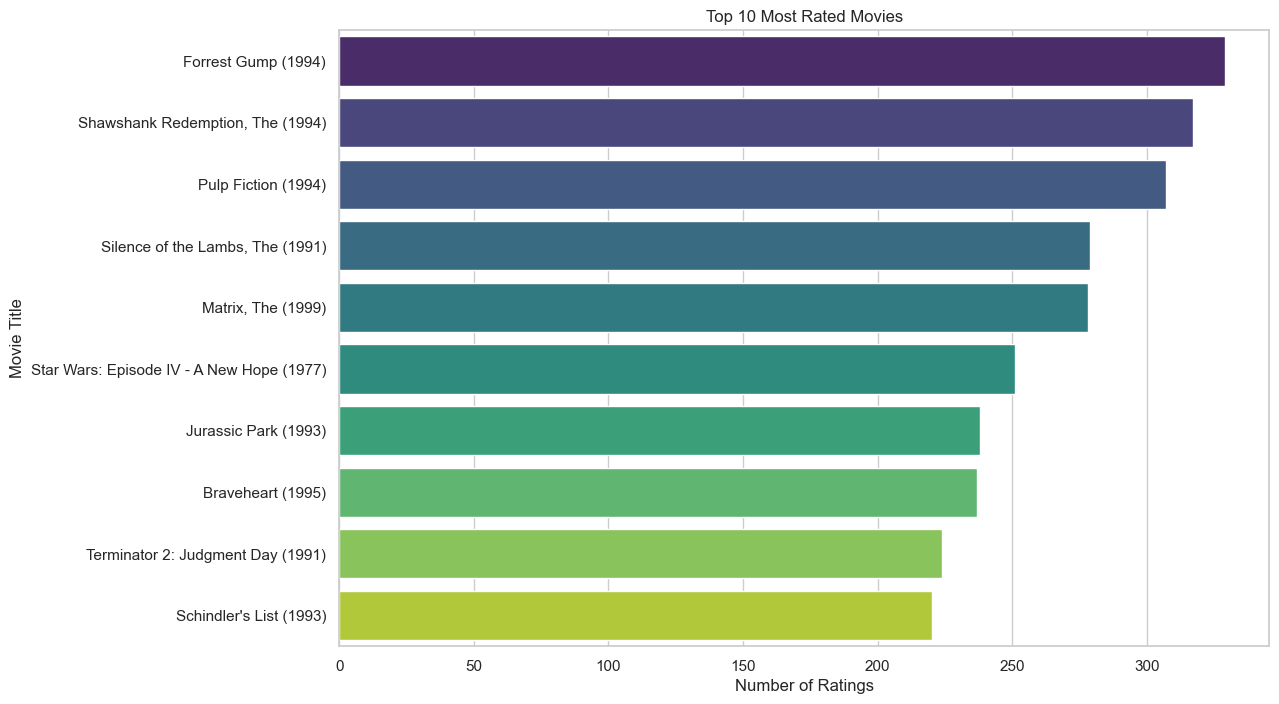

In [6]:
# Set the aesthetics for the plots
sns.set(style="whitegrid")

# # Plotting the distribution of ratings
# plt.figure(figsize=(10, 6))
# sns.countplot(x='rating', data=ratings_df, palette='viridis', hue='rating')
# plt.title('Distribution of Ratings')
# plt.xlabel('Rating')
# plt.ylabel('Count of Ratings')
# plt.show()

# # Finding the most rated movies by merging ratings with movies for better insight
# most_rated_movies = ratings_df.groupby('movieId').size().sort_values(ascending=False).head(10).reset_index(name='count')
# most_rated_movies = most_rated_movies.merge(movies_df, on='movieId', how='left')

# # Plotting the most rated movies
# plt.figure(figsize=(12, 8))
# sns.barplot(x='count', y='title', data=most_rated_movies, palette='viridis', hue='title')
# plt.title('Top 10 Most Rated Movies')
# plt.xlabel('Number of Ratings')
# plt.ylabel('Movie Title')
# plt.show()

# Plotting the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings_df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count of Ratings')
plt.show()

# Finding the most rated movies by merging ratings with movies for better insight
most_rated_movies = ratings_df.groupby('movieId').size().sort_values(ascending=False).head(10).reset_index(name='count')
most_rated_movies = most_rated_movies.merge(movies_df, on='movieId', how='left')

# Plotting the most rated movies
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='title', data=most_rated_movies, palette='viridis')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()

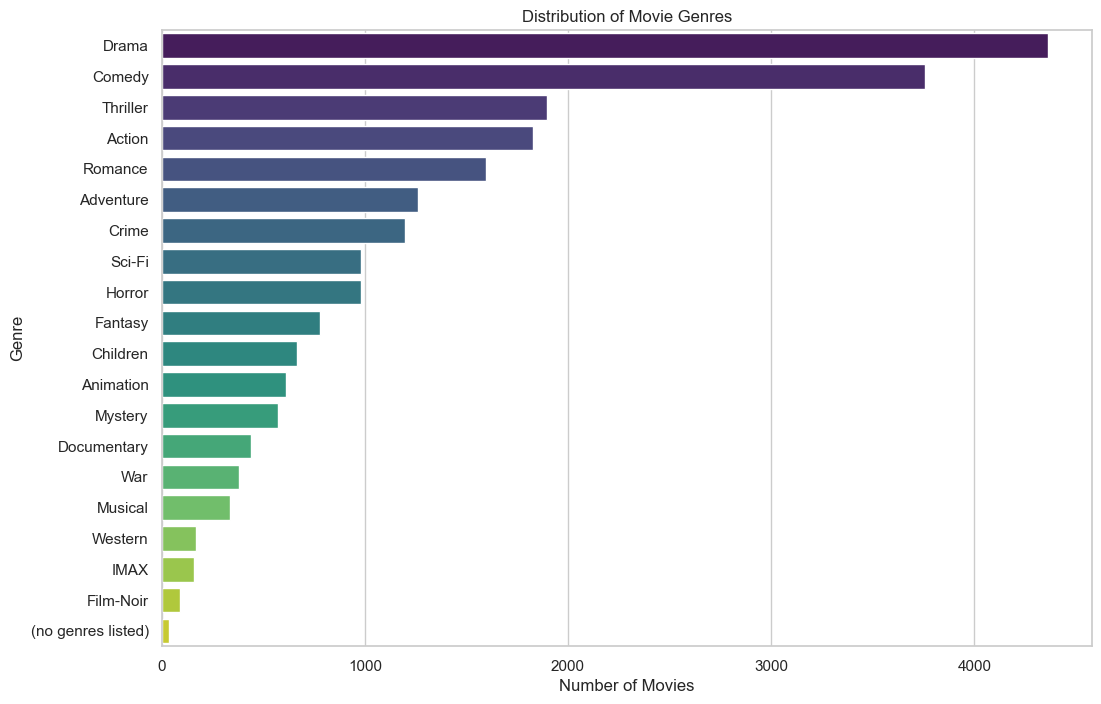

In [7]:
# Split the genres for each movie and count the occurrences of each genre
genre_counts = Counter(g for genres in movies_df['genres'] for g in genres.split('|'))

# Create a dataframe for the genre counts
genres_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

# Plotting the genre distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Genre', data=genres_df, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

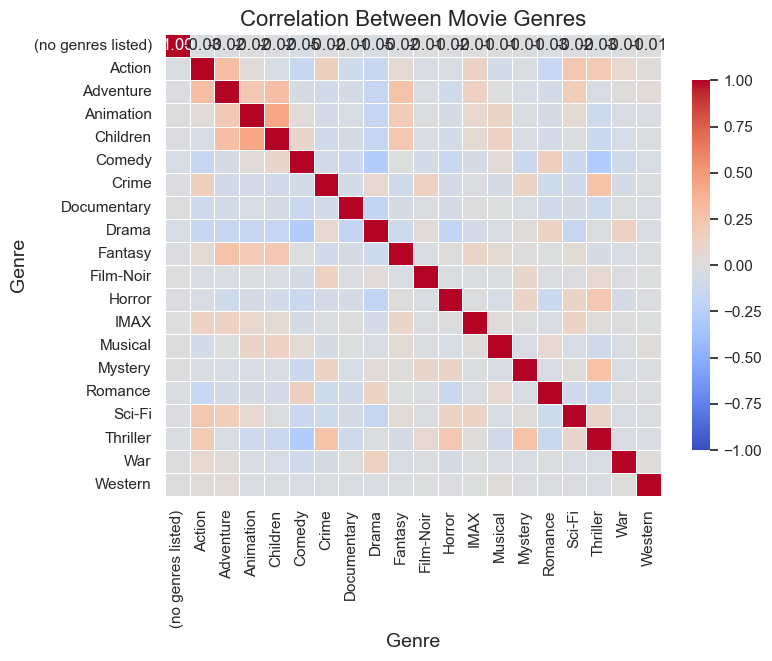

In [51]:
# Split the genres for each movie and create a binary matrix
genres = movies_df['genres'].str.get_dummies(sep='|')


# Compute the correlation matrix
genre_correlation = genres.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(genre_correlation, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(genre_correlation, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5, cbar_kws={"shrink": .8}, vmin=-1, vmax=1, center=0)

# Improve the title and labels
plt.title('Correlation Between Movie Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Genre', fontsize=14)

plt.show()

In [46]:
genre_correlation

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


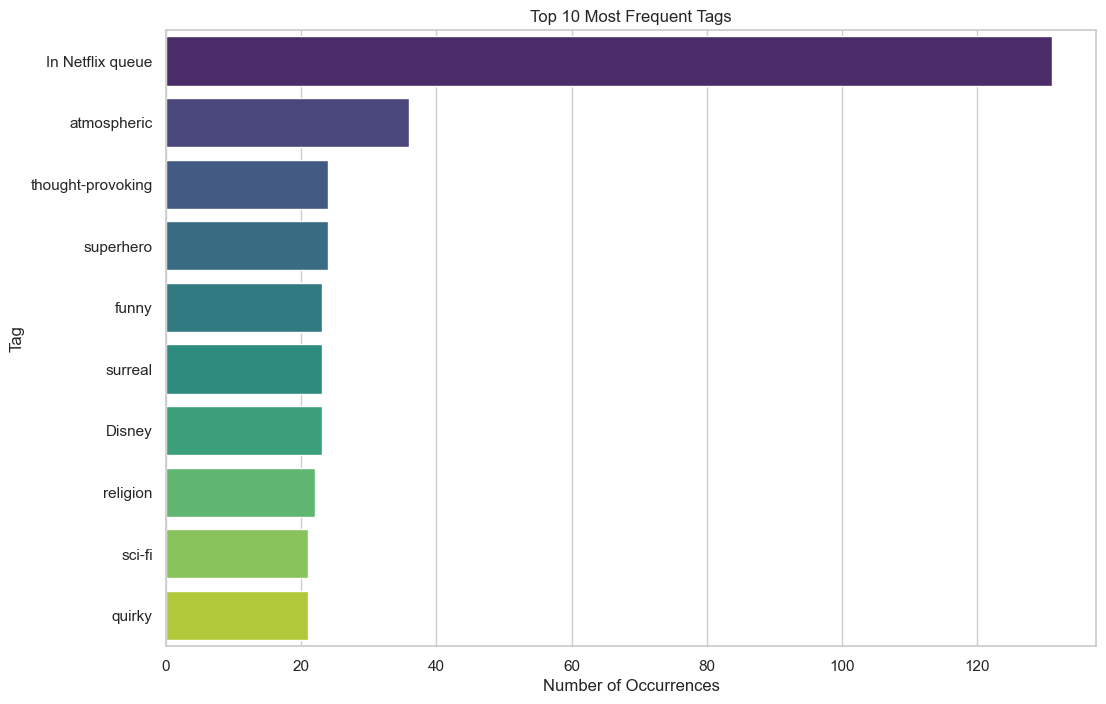

In [8]:
# Count the occurrences of each tag
tag_counts = tags_df['tag'].value_counts().head(10)

# Create a dataframe for the tag counts
tags_count_df = pd.DataFrame({'Tag': tag_counts.index, 'Count': tag_counts.values})

# Plotting the most common tags
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Tag', data=tags_count_df, palette='viridis')
plt.title('Top 10 Most Frequent Tags')
plt.xlabel('Number of Occurrences')
plt.ylabel('Tag')
plt.show()

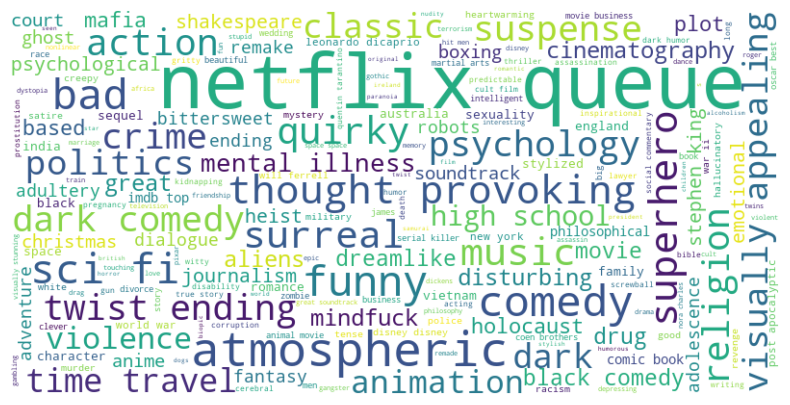

In [9]:
tags_list = tags_df['tag'].tolist()

# Convert list to a single string for word cloud generation
all_tags = ' '.join(tags_list).lower()

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.show()

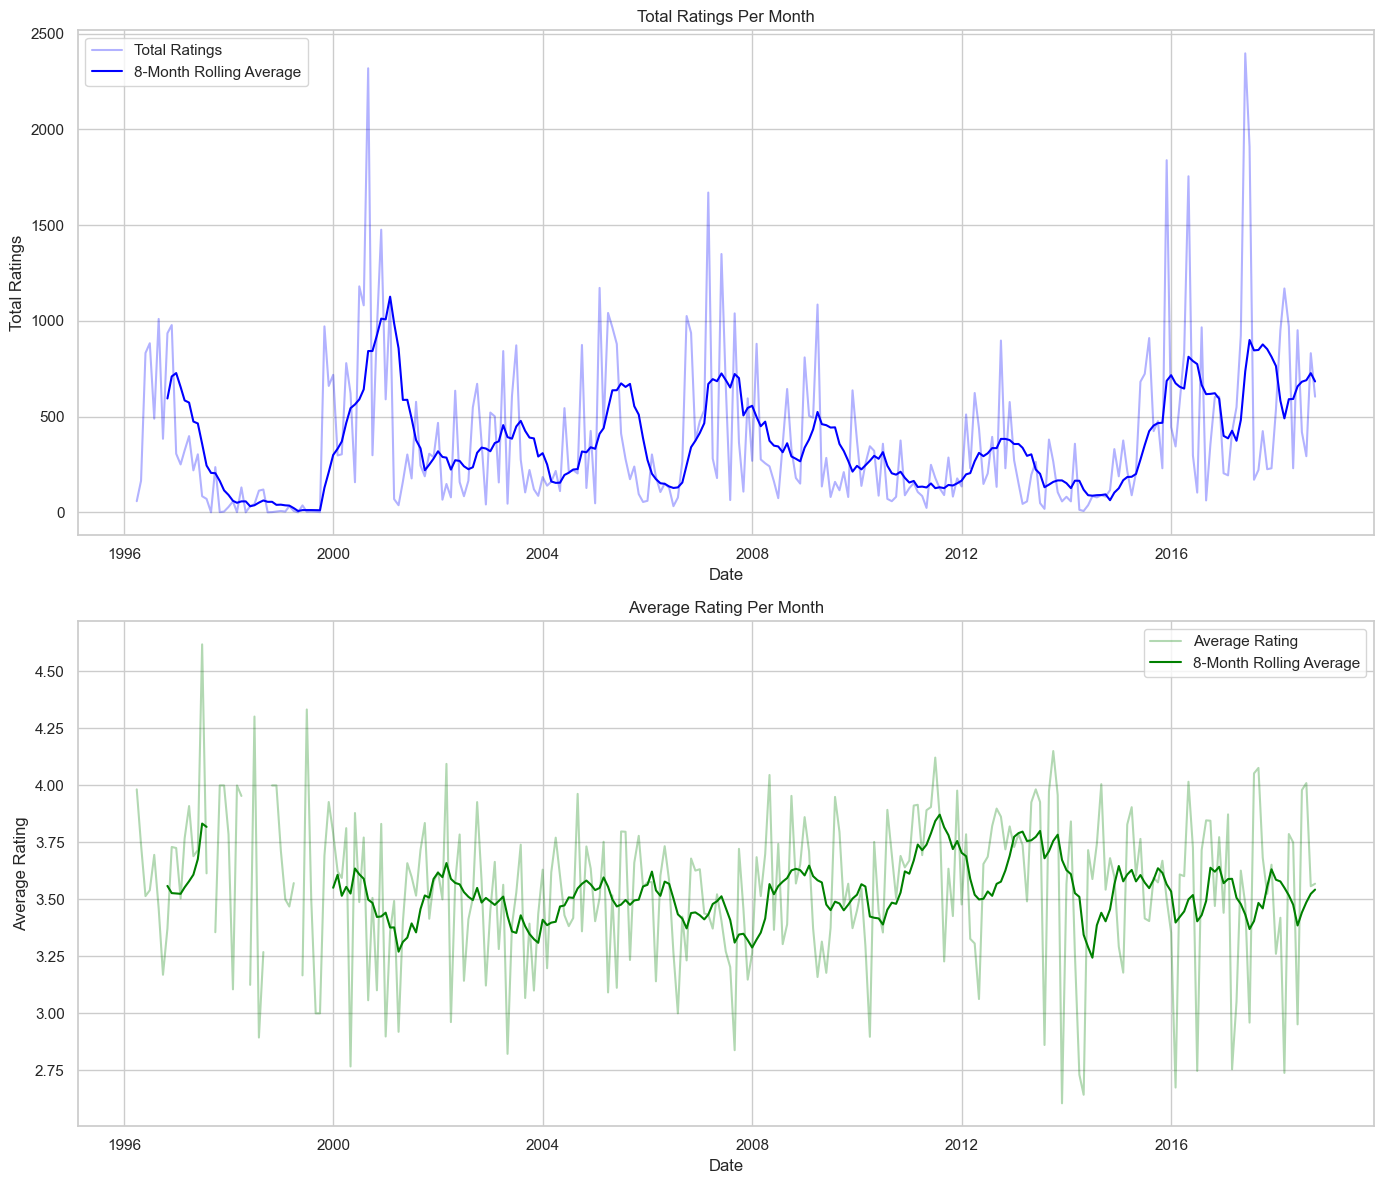

In [10]:
# Ensure the 'timestamp' column is converted to datetime format for temporal analysis
ratings_df['datetime'] = pd.to_datetime(ratings_df['timestamp'], unit='s')

# Aggregate total number of ratings and average ratings per month
ratings_per_month = ratings_df.groupby(pd.Grouper(key='datetime', freq='M')).agg({
    'rating': ['count', 'mean']
}).rename(columns={'count': 'Total Rating', 'mean': 'Average Rating'})

# Flatten the MultiIndex columns
ratings_per_month.columns = ['Total Rating', 'Average Rating']

# Calculate the rolling average with a 8-month window
ratings_per_month['Total Rating Rolling'] = ratings_per_month['Total Rating'].rolling(window=8).mean()
ratings_per_month['Average Rating Rolling'] = ratings_per_month['Average Rating'].rolling(window=8).mean()

# Plotting the results
fig, ax = plt.subplots(2, 1, figsize=(14, 12))

# Monthly ratings
ax[0].plot(ratings_per_month.index, ratings_per_month['Total Rating'], label='Total Ratings', color='blue', alpha=0.3)
ax[0].plot(ratings_per_month.index, ratings_per_month['Total Rating Rolling'], label='8-Month Rolling Average', color='blue')
ax[0].set_title('Total Ratings Per Month')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Total Ratings')
ax[0].legend()

# Average ratings
ax[1].plot(ratings_per_month.index, ratings_per_month['Average Rating'], label='Average Rating', color='green', alpha=0.3)
ax[1].plot(ratings_per_month.index, ratings_per_month['Average Rating Rolling'], label='8-Month Rolling Average', color='green')
ax[1].set_title('Average Rating Per Month')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Average Rating')
ax[1].legend()

plt.tight_layout()
plt.show()


# Correlations 

# COLLABORATIVE FILTERING 

# Useful functions 

In [1]:
def get_top_n(predictions, n=10):
    """Return the top-N recommendation for each user from a set of predictions."""
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Map the predictions to only the top N items
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

def get_top_n_recommendations(user_id, n=10):
    # Get a list of all movies in the dataset
    all_movies = movies_df['movieId'].unique()
    
    # Get movies that the user has already rated
    rated_movies = ratings_df[ratings_df['userId'] == user_id]['movieId'].tolist()
    
    # Predict ratings for all movies the user hasn't rated yet
    predictions = []
    for movie_id in set(all_movies) - set(rated_movies):
        pred = model.predict(uid=user_id, iid=movie_id)
        predictions.append((movie_id, pred.est))
    
    # Sort the predictions by estimated rating in descending order and select the top N
    top_n = sorted(predictions, key=lambda x: x[1], reverse=True)[:n]
    
    # Map the movie IDs back to titles
    top_n_movies = [(movies_df[movies_df['movieId'] == mid]['title'].values[0], est) for mid, est in top_n]
    
    return top_n_movies

def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user."""
    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        
        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        
        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        
        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls

def compute_rmse(predictions):
    """Compute Root Mean Squared Error (RMSE)."""
    mse = np.mean([(true_r - est) ** 2 for (_, _, true_r, est, _) in predictions])
    rmse = np.sqrt(mse)
    return rmse

def compute_mae(predictions):
    """Compute Mean Absolute Error (MAE)."""
    mae = np.mean([abs(true_r - est) for (_, _, true_r, est, _) in predictions])
    return mae

### Surprise Library for collaborative filtering

In [12]:
# Create a Surprise dataset
reader = Reader(rating_scale=(ratings_df['rating'].min(), ratings_df['rating'].max()))
data = Dataset.load_from_df(ratings_df[['userId', 'movieId', 'rating']], reader)

# Split the data into training and test sets
train_set, test_set = train_test_split(data, test_size=0.20)

# Output to check
train_set.n_ratings, len(test_set)

(80668, 20168)

In [13]:
# List of algorithms and their similarity measures to evaluate
algorithms = [
    ('KNNBasic', 'cosine'),
    ('KNNBasic', 'pearson'),
    ('KNNBasic', 'pearson_baseline'),
    ('KNNBasic', 'msd'),
    ('SVD', None),  # SVD does not use similarity measures
    ('CoClustering', None)  # CoClustering does not use similarity measures
]

## User-based collaborative filtering 

In [21]:
results_user_based = []
# Function to evaluate a model with a given algorithm and similarity measure
def evaluate_algorithm_user_based(algo_name, similarity_measure):
    if algo_name == 'KNNBasic':
        sim_options = {
            'name': similarity_measure,
            'user_based': True 
        }
        model = KNNBasic(sim_options=sim_options)
    elif algo_name == 'SVD':
        model = SVD()
    elif algo_name == 'CoClustering':
        model = CoClustering()
    # Measure start time
    start_time = time.time()
    
    # Train the model
    model.fit(train_set)
    
    # Make predictions on the test set
    predictions = model.test(test_set)

    # Measure end time
    end_time = time.time()
    # Calculate running time
    running_time = end_time - start_time
    
    # Evaluate accuracy
    rmse_score = accuracy.rmse(predictions, verbose=False)
    mae_score = accuracy.mae(predictions, verbose=False)
    
    # Compute precision and recall
    precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=3.5)
    precision_avg = sum(prec for prec in precisions.values()) / len(precisions)
    recall_avg = sum(rec for rec in recalls.values()) / len(recalls)
    
    return algo_name, similarity_measure, rmse_score, mae_score, precision_avg, recall_avg, running_time

# Evaluate each algorithm and similarity measure
for algo_name, similarity_measure in algorithms:
    algo_name, similarity_measure, rmse_score, mae_score, precision_avg, recall_avg,running_time = evaluate_algorithm_user_based(algo_name, similarity_measure)
    results_user_based.append({
        'Algorithm': algo_name,
        'Similarity Measure': similarity_measure if similarity_measure else 'N/A',
        'RMSE': rmse_score,
        'MAE': mae_score,
        'Precision@10': precision_avg,
        'Recall@10': recall_avg,
        'Running Time (s)': running_time
    })

# Convert the results to a DataFrame
results_user = pd.DataFrame(results_user_based)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [22]:
results_user

,Algorithm,Similarity Measure,RMSE,MAE,Precision@10,Recall@10,Running Time (s)
0,KNNBasic,cosine,0.975361,0.751160,0.762359,0.542984,1.404517
1,KNNBasic,pearson,0.975171,0.753571,0.767041,0.531998,1.350231
2,KNNBasic,pearson_baseline,0.975735,0.751083,0.769796,0.547555,1.587799
3,KNNBasic,msd,0.950905,0.728866,0.763983,0.550072,1.284623
4,SVD,N/A,0.878112,0.675617,0.740720,0.505839,1.055698
5,CoClustering,N/A,0.953876,0.738342,0.713700,0.496817,2.105703


## Item-based collaborative filtering 

In [24]:
# Initialize a list to store the results
results_item_based = []

# Function to evaluate a model with a given algorithm and similarity measure
def evaluate_algorithm_item_based(algo_name, similarity_measure):
    if algo_name == 'KNNBasic':
        sim_options = {
            'name': similarity_measure,
            'user_based': False  
        }
        model = KNNBasic(sim_options=sim_options)
    elif algo_name == 'SVD':
        model = SVD()
    elif algo_name == 'CoClustering':
        model = CoClustering()

    # Measure start time
    start_time = time.time()
    
    # Train the model
    model.fit(train_set)
    
    # Make predictions on the test set
    predictions = model.test(test_set)

    # Measure end time
    end_time = time.time()
    # Calculate running time
    running_time = end_time - start_time
    
    # Evaluate accuracy
    rmse_score = accuracy.rmse(predictions, verbose=False)
    mae_score = accuracy.mae(predictions, verbose=False)
    
    # Compute precision and recall
    precisions, recalls = precision_recall_at_k(predictions, k=10, threshold=3.5)
    precision_avg = sum(prec for prec in precisions.values()) / len(precisions)
    recall_avg = sum(rec for rec in recalls.values()) / len(recalls)
    
    return algo_name, similarity_measure, rmse_score, mae_score, precision_avg, recall_avg,running_time

# Evaluate each algorithm and similarity measure
for algo_name, similarity_measure in algorithms:
    algo_name, similarity_measure, rmse_score, mae_score, precision_avg, recall_avg, running_time = evaluate_algorithm_item_based(algo_name, similarity_measure)
    results_item_based.append({
        'Algorithm': algo_name,
        'Similarity Measure': similarity_measure if similarity_measure else 'N/A',
        'RMSE': rmse_score,
        'MAE': mae_score,
        'Precision@10': precision_avg,
        'Recall@10': recall_avg,
        'Running Time (s)': running_time
    })

# Convert the results to a DataFrame
results_item = pd.DataFrame(results_item_based)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [25]:
results_item

,Algorithm,Similarity Measure,RMSE,MAE,Precision@10,Recall@10,Running Time (s)
0,KNNBasic,cosine,0.976205,0.758229,0.606328,0.468789,12.434747
1,KNNBasic,pearson,0.970853,0.752275,0.659565,0.475677,17.562617
2,KNNBasic,pearson_baseline,0.920997,0.697062,0.717479,0.527799,13.241225
3,KNNBasic,msd,0.911143,0.699371,0.658120,0.490918,11.303734
4,SVD,N/A,0.877152,0.675094,0.737572,0.507827,1.292164
5,CoClustering,N/A,0.953733,0.737701,0.710779,0.496873,3.057940


# Graph based RecSys

In [4]:
from igraph import Graph, plot

links_df = pd.read_csv('MovieLens_100k/links.csv')
movies_df = pd.read_csv('MovieLens_100k/movies.csv')
ratings_df = pd.read_csv('MovieLens_100k/ratings.csv')
tags_df = pd.read_csv('MovieLens_100k/tags.csv')

# Create a list of tuples representing edges between users and movies
edges = [(int(row['userId']), int(row['movieId'])) for _, row in ratings_df.iterrows()]

# Create lists of unique nodes for users and movies
user_nodes = [int(user) for user in ratings_df['userId'].unique()]
movie_nodes = [int(movie) + max(user_nodes) + 1 for movie in movies_df['movieId'].unique()]

# Combine all nodes and their types (0 for users, 1 for movies)
nodes = user_nodes + movie_nodes
types = [0] * len(user_nodes) + [1] * len(movie_nodes)

# Create the igraph graph
g = Graph(edges=edges, directed=False)

# Set attributes for nodes (vertex)
g.vs['type'] = types  # Type for bipartite identification
g.vs['name'] = nodes  # Unique identifier

# Add edge weights based on ratings
g.es['weight'] = [float(row['rating']) for _, row in ratings_df.iterrows()]

# Display basic information about the graph
print(g.summary())

IGRAPH UNWT 193610 100836 -- 
+ attr: name (v), type (v), weight (e)


In [6]:
!pip install pycairo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.9/346.9 kB 2.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycairo: filename=pycairo-1.26.0-cp311-cp311-macosx_10_9_x86_64.whl size=128969 sha256=3d5451590c3d260735ad21ec7f97d9426b036575062029966ede715885f7902d
  Stored in directory: /Users/diatt17/Library/Caches/pip/wheels/0c/b8/4f/a2025bfa68ab79f67ee6cb32b00365ec247bc3c15cc3d58324
Successfully built pycairo


In [8]:
# Define visual style for plotting
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_color"] = ["blue" if type == 0 else "red" for type in types]
visual_style["vertex_label"] = [str(node) for node in nodes]
visual_style["edge_width"] = [weight / 2 for weight in g.es['weight']]
visual_style["layout"] = g.layout_bipartite()
visual_style["bbox"] = (1000, 1000)
visual_style["margin"] = 20

# Plot the graph
plot(g, **visual_style)

AttributeError: Plotting not available; please install pycairo or cairocffi

# New GCN

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

class GraphConvolutionLayer(Layer):
    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(GraphConvolutionLayer, self).__init__(**kwargs)
        
    def build(self, input_shape):
        self.kernel = self.add_weight(name='kernel', 
                                      shape=(input_shape[0][-1], self.output_dim),
                                      initializer='uniform',
                                      trainable=True)
        super(GraphConvolutionLayer, self).build(input_shape)
        
    def call(self, inputs):
        features, adjacency_matrix = inputs
        feature_transform = tf.matmul(features, self.kernel)
        output = tf.matmul(adjacency_matrix, feature_transform)
        return output

# Example usage
# gcn_layer = GraphConvolutionLayer(output_dim=16)


2024-05-26 23:30:09.346760: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
class GCN(Model):
    def __init__(self, output_dim, num_layers, **kwargs):
        super(GCN, self).__init__(**kwargs)
        self.gc_layers = [GraphConvolutionLayer(output_dim) for _ in range(num_layers)]
        
    def call(self, inputs):
        features, adjacency_matrix = inputs
        for gc_layer in self.gc_layers:
            features = gc_layer([features, adjacency_matrix])
        return features

# Example usage
# gcn_model = GCN(output_dim=16, num_layers=2)

In [ ]:
import numpy as np

# Assuming 'features' is a numpy array of node features and 'adjacency_matrix' is the graph adjacency matrix
features = np.random.rand(len(nodes), 128)  # Example feature matrix
adjacency_matrix = np.array(g.get_adjacency().data)

# Convert to TensorFlow tensors
features = tf.convert_to_tensor(features, dtype=tf.float32)
adjacency_matrix = tf.convert_to_tensor(adjacency_matrix, dtype=tf.float32)

# Create the GCN model
gcn_model = GCN(output_dim=16, num_layers=2)

# Compile the model
gcn_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

# Train the model
gcn_model.fit([features, adjacency_matrix], features, epochs=100)